### Задание

С использованием библиотек Numpy и Pandas написать программу реализующую:

1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3. Подсчет длин предложений и их количества.
4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5. Построение гистограммы частоты встречаемости слов.

p.s. Рекомендую перед решением задания проанализировать задачу и обосновать алгоритм ее решения в текстовом виде. В процессе написания кода использовать комментарии.

**Исходные данные:**
* необходимо использовать любой текст длинной более 20_000 символов.

**Цель:**
* научиться работать с DataFrame и Series библиотеки pandas.

**Ограничения:**
* можно использовать только numpy и pandas;
* полученный код не расчитан на то, чтобы быть пригодным для работы с другим текстом.

**Главная задача:**
* необходимо выделить из текста слова и предложения, посчитать их и проанализировать с использованием библиотеки pandas.

**Алгоритм решения задачи:**

_1) Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы._
* для выполнения задания возьму отрывок из 'Война и мир' Толстого.

_2) Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно)._
* необходимо привести текст к нижнему регистру, удалить все символы, которые не являются буквами;
* убрав лишние пробелы и переносы строк, разбить текст на слова;
* рассчитать меру схожести слов. Для этого воспользуюсь алгоритмом "расстояния Дамерау-Левенштейна";
* поэксперементировать с точностью определения слов, используя вспомогательные коэффициенты для разных операций в алгоритме, а также за счёт вспомогательных коэффициентов в зависимости от того, ближе к началу или к концу слова производится операция;
* посчитав наиболее часто встречающиеся словоформы, составить словарь, где часто встречающая словоформа - основное слово, а за счёт коэффициентов Дамерау-Левенштейна в качестве списка значений присвоить похожие слова.

_3) Подсчет длин предложений и их количества._
* необходимо разбить исходный текст на предложения по символам разбиения;
* реализовать подсчёт длин предложений и их кол-ва.

_4) Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки"._
* сформировать метрики, которые бы харктеризовали текст, т.к. кол-во предложений, средняя длина предложений, кол-во слов в тексте и т.п. 
* метрики оформить в виде DataFrame и Series.

_5) Построение гистограммы частоты встречаемости слов._
* посчитать, как часто встречается каждое отдельное слово в тексте;
* в словаре слов/словоформ заменить значения на кол-во вхождений в текст;
* построить plot.bar, где по оси x - ключи, а по оси y - сумма количества словоформ.

In [67]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from tqdm import tqdm_notebook
import re
import matplotlib.pyplot as plt

In [2]:
with open('data/text.txt', 'r', encoding='windows-1251') as book:
    text = book.read()

In [3]:
# перекодирую текст, так встретился с ошибками из-за этого
text = text.encode('utf-8').decode('utf-8')

In [4]:
len(text)

29989

In [5]:
# начало книги "Робинзон Крузо"
text[0:1000]

'Я родился в 1632 году в городе Йорке в зажиточной семье иностранного происхождения. Мой отец был родом из Бремена и основался сначала в Гулле. Нажив торговлей хорошее состояние, он оставил дела и переселился в Йорк. Здесь он женился на моей матери, родные которой назывались Робинзонами – старинная фамилия в тех местах. По ним и меня назвали Робинзоном. Фамилия отца была Крейцнер, но, по обычаю англичан коверкать иностранные слова, нас стали называть Крузо. Теперь мы и сами так произносим и пишем нашу фамилию; так же всегда звали меня и мои знакомые.\n\nУ меня было два старших брата. Один служил во Фландрии, в английском пехотном полку, – том самом, которым когда то командовал знаменитый полковник Локгарт; он дослужился до чина подполковника и был убит в сражении с испанцами под Дюнкирхеном. Что сталось со вторым моим братом – не знаю, как не знали мои отец и мать, что сталось со мной.\n\nТак как в семье я был третьим, то меня не готовили ни к какому ремеслу, и голова моя с юных лет бы

In [6]:
text = text.lower()

In [7]:
text[0:1000]

'я родился в 1632 году в городе йорке в зажиточной семье иностранного происхождения. мой отец был родом из бремена и основался сначала в гулле. нажив торговлей хорошее состояние, он оставил дела и переселился в йорк. здесь он женился на моей матери, родные которой назывались робинзонами – старинная фамилия в тех местах. по ним и меня назвали робинзоном. фамилия отца была крейцнер, но, по обычаю англичан коверкать иностранные слова, нас стали называть крузо. теперь мы и сами так произносим и пишем нашу фамилию; так же всегда звали меня и мои знакомые.\n\nу меня было два старших брата. один служил во фландрии, в английском пехотном полку, – том самом, которым когда то командовал знаменитый полковник локгарт; он дослужился до чина подполковника и был убит в сражении с испанцами под дюнкирхеном. что сталось со вторым моим братом – не знаю, как не знали мои отец и мать, что сталось со мной.\n\nтак как в семье я был третьим, то меня не готовили ни к какому ремеслу, и голова моя с юных лет бы

In [8]:
alphabet = set('абвгдеёжзийклмнопрстуфхцчщшъыьэюя')

In [9]:
other_symbols = set(text)

In [10]:
other_symbols

{'\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '1',
 '2',
 '3',
 '5',
 '6',
 ':',
 ';',
 '?',
 '«',
 '»',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 '–',
 '…'}

In [11]:
# составим список лишних символов

other_symbols = other_symbols.difference(alphabet)

In [12]:
other_symbols

{'\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '1',
 '2',
 '3',
 '5',
 '6',
 ':',
 ';',
 '?',
 '«',
 '»',
 '–',
 '…'}

In [13]:
# заменим лишние символы пробелами, чтобы случайно не склеить слова, разделённые лишними символами.

for l in other_symbols:
    text = text.replace(l, ' ')

In [14]:
text[0:1000]

'я родился в      году в городе йорке в зажиточной семье иностранного происхождения  мой отец был родом из бремена и основался сначала в гулле  нажив торговлей хорошее состояние  он оставил дела и переселился в йорк  здесь он женился на моей матери  родные которой назывались робинзонами   старинная фамилия в тех местах  по ним и меня назвали робинзоном  фамилия отца была крейцнер  но  по обычаю англичан коверкать иностранные слова  нас стали называть крузо  теперь мы и сами так произносим и пишем нашу фамилию  так же всегда звали меня и мои знакомые   у меня было два старших брата  один служил во фландрии  в английском пехотном полку    том самом  которым когда то командовал знаменитый полковник локгарт  он дослужился до чина подполковника и был убит в сражении с испанцами под дюнкирхеном  что сталось со вторым моим братом   не знаю  как не знали мои отец и мать  что сталось со мной   так как в семье я был третьим  то меня не готовили ни к какому ремеслу  и голова моя с юных лет была н

In [15]:
# метод сплит разбивает по умолчанию по пробелам
text = text.split()

In [16]:
text

['я',
 'родился',
 'в',
 'году',
 'в',
 'городе',
 'йорке',
 'в',
 'зажиточной',
 'семье',
 'иностранного',
 'происхождения',
 'мой',
 'отец',
 'был',
 'родом',
 'из',
 'бремена',
 'и',
 'основался',
 'сначала',
 'в',
 'гулле',
 'нажив',
 'торговлей',
 'хорошее',
 'состояние',
 'он',
 'оставил',
 'дела',
 'и',
 'переселился',
 'в',
 'йорк',
 'здесь',
 'он',
 'женился',
 'на',
 'моей',
 'матери',
 'родные',
 'которой',
 'назывались',
 'робинзонами',
 'старинная',
 'фамилия',
 'в',
 'тех',
 'местах',
 'по',
 'ним',
 'и',
 'меня',
 'назвали',
 'робинзоном',
 'фамилия',
 'отца',
 'была',
 'крейцнер',
 'но',
 'по',
 'обычаю',
 'англичан',
 'коверкать',
 'иностранные',
 'слова',
 'нас',
 'стали',
 'называть',
 'крузо',
 'теперь',
 'мы',
 'и',
 'сами',
 'так',
 'произносим',
 'и',
 'пишем',
 'нашу',
 'фамилию',
 'так',
 'же',
 'всегда',
 'звали',
 'меня',
 'и',
 'мои',
 'знакомые',
 'у',
 'меня',
 'было',
 'два',
 'старших',
 'брата',
 'один',
 'служил',
 'во',
 'фландрии',
 'в',
 'английском

In [17]:
text = pd.Series(text)

In [18]:
text = text[text != '']

In [19]:
text

0                   я
1             родился
2                   в
3                году
4                   в
5              городе
6               йорке
7                   в
8          зажиточной
9               семье
10       иностранного
11      происхождения
12                мой
13               отец
14                был
15              родом
16                 из
17            бремена
18                  и
19          основался
20            сначала
21                  в
22              гулле
23              нажив
24          торговлей
25            хорошее
26          состояние
27                 он
28            оставил
29               дела
            ...      
4849                с
4850          помощью
4851             моих
4852    родственников
4853                с
4854         которыми
4855              был
4856                в
4857        переписке
4858                и
4859          которые
4860              как
4861                я
4862      предполагаю
4863      

In [20]:
np.set_printoptions(edgeitems=150, linewidth=100)

In [21]:
print(text)

0                   я
1             родился
2                   в
3                году
4                   в
5              городе
6               йорке
7                   в
8          зажиточной
9               семье
10       иностранного
11      происхождения
12                мой
13               отец
14                был
15              родом
16                 из
17            бремена
18                  и
19          основался
20            сначала
21                  в
22              гулле
23              нажив
24          торговлей
25            хорошее
26          состояние
27                 он
28            оставил
29               дела
            ...      
4849                с
4850          помощью
4851             моих
4852    родственников
4853                с
4854         которыми
4855              был
4856                в
4857        переписке
4858                и
4859          которые
4860              как
4861                я
4862      предполагаю
4863      

In [22]:
words = text.copy()

In [23]:
words[0: 15]

0                 я
1           родился
2                 в
3              году
4                 в
5            городе
6             йорке
7                 в
8        зажиточной
9             семье
10     иностранного
11    происхождения
12              мой
13             отец
14              был
dtype: object

In [24]:
# для того, чтобы уменьшить кол-во сравнений, удалим дубликаты слов.
u_words = words.drop_duplicates()

In [25]:
u_words.sort_values()[-10:-1]

3670        ярмут
4259       ярмута
2396       ярмуте
2379    ярмутский
3768    ярмутском
3066      яростью
3779          ясе
694         яснее
1857         ясно
dtype: object

In [26]:
# создадим матрицу, в которую в последствии будем записывать коэффициенты похожести слов

df = pd.DataFrame(np.zeros((len(u_words), len(u_words)))).astype(int)

axis = CategoricalDtype(categories=u_words)
df['u_words'] = u_words.values
df['u_words'] = df['u_words'].astype(axis)
df = df.set_index('u_words')
df.columns = u_words.values
df.columns = df.columns.astype(axis)

In [27]:
df.take([0, 1, 2, -3, -2, -1])

,я,родился,в,году,городе,йорке,зажиточной,семье,иностранного,происхождения,...,помощью,родственников,переписке,предполагаю,убедили,вернее,хоть,суммой,первом,предприятии
u_words,,,,,,,,,,,,,,,,,,,,,
я,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
родился,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
в,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
суммой,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
первом,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
предприятии,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# рекурсивная функция, рассчитывающая расстояние Дамерау-Левенштейна

def D(i, j, s1, s2, COEFFS):
    '''Алгоритм Дамерау-Левенштейна'''
    
    # условие завершения, выполняющееся, когда все символы перебраны
    if i == j == 0:
        return 0
    
    # условие завершения, выполняющееся, когда символы строки s2 перебраны
    elif i > 0 and j == 0:
        return i * COEFFS['delete_cost']
    
    # условие завершения, выполняющееся, когда символы строки s1 перебраны
    elif i == 0 and j > 0:
        return j * COEFFS['insert_cost']
    
    elif i > 0 and j > 0:
        delete = D(i, j-1, s1, s2, COEFFS) + COEFFS['delete_cost'] # операция удаления символа из строки s1
        
        insert = D(i-1, j, s1, s2, COEFFS) + COEFFS['insert_cost'] # операция вставки в строку s1
        
        match = (0 if s1[i] == s2[j] else 1) * COEFFS['replace_cost'] # операция замены символов
        replace = D(i-1, j-1, s1, s2, COEFFS) + match

        if i > 1 and j > 1 and s1[i] == s2[j-1] and s1[i-1] == s2[j]: 
            transpose = D(i-2, j-2, s1, s2, COEFFS) + COEFFS['transpose_cost'] # попытка поменять символы местами
            return min(delete, insert, replace, transpose)
        
        else:
            return min(delete, insert, replace)

In [33]:
%%html
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/e2fa2d970c568b613cb63b307e2bb615037c9fc3'>
# рекурентная формула Дамерау-Левенштейна

In [ ]:
# т.к. рекурсивный алгоритм Дамерау-Левенштейна работает слишком медленно, 
# пришлось использовать более подходящий по производительности
# алгоритм Вагнера-Фишера, который считает расстояние Левенштейна.

In [34]:
def D(m , n, s1, s2, COEFFS):
    '''Алгоритм Вагнера-Фишера, рассчитывающий расстояние Левенштейна.'''
    
    current_row = range(m+1) # переменная для значений предыдущей строки
    
    for i in range(1, n+1):
        
        previous_row, current_row = current_row, [i]+[0]*m
        # сохраняем предыдущую строку
        # создаём пусту матрицу для новых значений
        
        for j in range(1, m+1):
        
            delete = current_row[j-1] + COEFFS['delete_cost']
            
            insert = previous_row[j] + COEFFS['insert_cost']
            
            match = (0 if s1[j-1] == s2[i-1] else 1) * COEFFS['replace_cost'] 
            replace = previous_row[j-1] + match
                        
            current_row[j] = min(delete, insert, replace)

    return current_row[m]

In [35]:
# функция, где хранятся коэффициенты для операций

def distance(s1, s2):
    
    COEFFS = {
    'delete_cost': 1,
    'insert_cost': 1,
    'replace_cost': 1,
    'transpose_cost': 1
    }
    
    m, n = len(s1), len(s2)
    
    if m > n:
        s1, s2 = s2, s1
        m, n = n, m
    
    return  1 - D(m, n, s1, s2, COEFFS) / max(m, n)

In [36]:
# пример работы функции
w1 = '000001'
w2 = '0000011'

distance(w1, w2)

0.8571428571428572

In [ ]:
%%time
# считаем расстояние между словами

i = 1
for w1 in tqdm_notebook(df.index):
    for w2 in tqdm_notebook(df.columns[i:]):
        df.loc[w1, w2] = distance(w1, w2)
    i += 1

In [ ]:
df.to_csv(r'data/half.csv')

In [ ]:
# здесь мне пришлось перезагрузить ноутбук, поэтому я повторно не выполняю блоки выше, а читаю записанный файл.

In [37]:
df = pd.read_csv(r'data/half.csv', index_col='u_words')

In [38]:
df.sample(6)

,я,родился,в,году,городе,йорке,зажиточной,семье,иностранного,происхождения,...,помощью,родственников,переписке,предполагаю,убедили,вернее,хоть,суммой,первом,предприятии
u_words,,,,,,,,,,,,,,,,,,,,,
прояснилась,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.230769,0.181818,0.272727,0.181818,0.090909,0.181818,0.090909,0.090909,0.272727
решительное,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.307692,0.272727,0.181818,0.181818,0.272727,0.181818,0.090909,0.181818,0.090909
новичка,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.230769,0.222222,0.090909,0.000000,0.000000,0.142857,0.000000,0.000000,0.090909
положение,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.307692,0.222222,0.181818,0.111111,0.222222,0.111111,0.000000,0.111111,0.181818
добраться,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222222,0.076923,0.111111,0.090909,0.111111,0.111111,0.333333,0.000000,0.111111,0.090909
заставила,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.230769,0.000000,0.090909,0.222222,0.000000,0.111111,0.111111,0.111111,0.090909


In [40]:
df.index = df.index.astype(axis)
df.columns = df.columns.astype(axis)

In [41]:
# похожесть слов на самих себя = 1

for w in df.index:
    df.loc[w, w] = 1

In [42]:
df.sample(5)

,я,родился,в,году,городе,йорке,зажиточной,семье,иностранного,происхождения,...,помощью,родственников,переписке,предполагаю,убедили,вернее,хоть,суммой,первом,предприятии
u_words,,,,,,,,,,,,,,,,,,,,,
промчались,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.300000,0.153846,0.200000,0.272727,0.200000,0.000000,0.2,0.1,0.200000,0.181818
решался,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.153846,0.222222,0.272727,0.142857,0.142857,0.0,0.0,0.142857,0.272727
может,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.153846,0.111111,0.090909,0.000000,0.166667,0.2,0.0,0.000000,0.090909
один,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.230769,0.111111,0.090909,0.285714,0.166667,0.0,0.0,0.000000,0.181818
пыл,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.000000,0.111111,0.181818,0.142857,0.000000,0.0,0.0,0.166667,0.090909


In [ ]:
# таблица заполнена не полность, а на половину. 
# заполняем недостающие значения, которые зеркально равны уже заполненным значениям

i = 1

for w1 in tqdm_notebook(df.index):
    for w2 in df.columns[i:]:
        df.loc[w2, w1] = df.loc[w1, w2]
    i += 1    

In [43]:
df.sample(5)

,я,родился,в,году,городе,йорке,зажиточной,семье,иностранного,происхождения,...,помощью,родственников,переписке,предполагаю,убедили,вернее,хоть,суммой,первом,предприятии
u_words,,,,,,,,,,,,,,,,,,,,,
мое,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.153846,0.111111,0.090909,0.142857,0.166667,0.250000,0.333333,0.166667,0.090909
отцовского,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100000,0.230769,0.100000,0.090909,0.000000,0.100000,0.100000,0.100000,0.200000,0.000000
нажив,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.153846,0.111111,0.090909,0.142857,0.000000,0.000000,0.000000,0.000000,0.090909
учиться,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.076923,0.111111,0.000000,0.142857,0.000000,0.285714,0.000000,0.000000,0.090909
или,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.076923,0.111111,0.090909,0.428571,0.000000,0.000000,0.000000,0.000000,0.181818


In [ ]:
df.to_csv(r'data/k_table.csv')

In [49]:
df = pd.read_csv(r'data/k_table.csv', index_col=0)

In [50]:
df.index = df.index.astype(axis)
df.columns = df.columns.astype(axis)

In [51]:
df.head(5)

,я,родился,в,году,городе,йорке,зажиточной,семье,иностранного,происхождения,...,помощью,родственников,переписке,предполагаю,убедили,вернее,хоть,суммой,первом,предприятии
u_words,,,,,,,,,,,,,,,,,,,,,
я,1.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.090909
родился,0.142857,1.000000,0.0,0.285714,0.142857,0.142857,0.1,0.000000,0.083333,0.307692,...,0.142857,0.307692,0.222222,0.272727,0.285714,0.000000,0.142857,0.0,0.000000,0.272727
в,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.166667,0.000000
году,0.000000,0.285714,0.0,1.000000,0.500000,0.200000,0.1,0.000000,0.083333,0.153846,...,0.142857,0.153846,0.000000,0.090909,0.142857,0.000000,0.250000,0.0,0.000000,0.090909
городе,0.000000,0.142857,0.0,0.500000,1.000000,0.500000,0.1,0.166667,0.250000,0.307692,...,0.285714,0.153846,0.222222,0.090909,0.000000,0.333333,0.166667,0.0,0.166667,0.090909


In [52]:
# чтобы избежать множественного чтения списков, будем использовать словари, которые работают быстрее, если нужно
# делать проверку вхождения

used = {}

words = {}

k = 0.75 # примем за допустимое значение схожести слов

for w in df.index:
    if not used.get(w, False): # следующий код выполняется, если слово ранее не было использовано
        words[w] = list(df[df[w] > k][w].index)
        for v in words[w]:
            used[v] = True
    
    


In [53]:
words

{'я': ['я'],
 'родился': ['родился'],
 'в': ['в'],
 'году': ['году'],
 'городе': ['городе', 'город'],
 'йорке': ['йорке', 'йорк'],
 'зажиточной': ['зажиточной'],
 'семье': ['семье', 'семь'],
 'иностранного': ['иностранного'],
 'происхождения': ['происхождения'],
 'мой': ['мой'],
 'отец': ['отец'],
 'был': ['был'],
 'родом': ['родом'],
 'из': ['из'],
 'бремена': ['бремена'],
 'и': ['и'],
 'основался': ['основался', 'основаться', 'оставался'],
 'сначала': ['сначала', 'начала'],
 'гулле': ['гулле', 'гулля', 'гулль'],
 'нажив': ['нажив'],
 'торговлей': ['торговлей', 'торговля'],
 'хорошее': ['хорошее', 'хорошей', 'хорошие'],
 'состояние': ['состояние', 'состояния', 'состоянии'],
 'он': ['он'],
 'оставил': ['оставил', 'поставила', 'оставив'],
 'дела': ['дела', 'делал'],
 'переселился': ['переселился'],
 'здесь': ['здесь'],
 'женился': ['женился'],
 'на': ['на'],
 'моей': ['моей'],
 'матери': ['матери'],
 'родные': ['родные'],
 'которой': ['которой', 'который', 'которое', 'котором'],
 'назыв

In [54]:
# превратим исходный массив не уникальных слов в датафрейм
tdf = pd.DataFrame(text, columns=['words'])

In [55]:
tdf

,words
0,я
1,родился
2,в
3,году
4,в
5,городе
6,йорке
7,в
8,зажиточной
9,семье


In [56]:
tdf = tdf.groupby(['words'])['words'].count()

In [57]:
tdf

words
а                  17
английском          1
англичан            1
армию               1
африки              1
ах                  2
барином             1
батюшка             1
батюшку             1
бегали              1
беде                1
бедности            1
бедственном         1
бедствие            1
бедствию            1
бедствия            1
бедствиях           1
бежал               1
бежать              2
без                 7
безветрии           1
безделушек          1
безопасно           1
безумной            1
безумцами           1
берег               2
берегам             2
береговая           1
берегу              3
бескорыстности      1
                 ... 
эту                 3
юго                 1
юнец                1
юноша               1
юнцами              1
юных                1
юристы              2
я                 127
является            1
являлся             1
являясь             1
явно                1
явное               1
языке               1
якор

In [58]:
words_count = pd.DataFrame(tdf).rename(columns={'words': 'count'})

In [59]:
words_count

,count
words,
а,17
английском,1
англичан,1
армию,1
африки,1
ах,2
барином,1
батюшка,1
батюшку,1


In [60]:
words_count.index = words_count.index.astype(axis)

In [61]:
words_count.index

CategoricalIndex(['а', 'английском', 'англичан', 'армию', 'африки', 'ах',
                  'барином', 'батюшка', 'батюшку', 'бегали',
                  ...
                  'ярмут', 'ярмута', 'ярмуте', 'ярмутский', 'ярмутском',
                  'яростью', 'ясе', 'яснее', 'ясно', 'ясное'],
                 categories=['я', 'родился', 'в', 'году', 'городе', 'йорке', 'зажиточной', 'семье', ...], ordered=False, name='words', dtype='category', length=2111)

In [62]:
# здесь мы поочерёдно достаём значения похожих слов и считаем их кол-во. В итоге получим словарь,
# где в качестве ключей - слова, а в качестве значений - сумма их словоформ и похожих слов

words_qty = {}

for w in words.keys():
    values = words[w]
    s = 0
    
    for v in values:
        qty = words_count.loc[v, 'count']
        s += qty
    
    words_qty[w] = s

In [63]:
words_qty

{'я': 127,
 'родился': 1,
 'в': 130,
 'году': 1,
 'городе': 2,
 'йорке': 2,
 'зажиточной': 1,
 'семье': 3,
 'иностранного': 1,
 'происхождения': 1,
 'мой': 9,
 'отец': 15,
 'был': 24,
 'родом': 1,
 'из': 21,
 'бремена': 1,
 'и': 209,
 'основался': 3,
 'сначала': 2,
 'гулле': 5,
 'нажив': 1,
 'торговлей': 2,
 'хорошее': 4,
 'состояние': 9,
 'он': 46,
 'оставил': 3,
 'дела': 4,
 'переселился': 1,
 'здесь': 3,
 'женился': 1,
 'на': 78,
 'моей': 8,
 'матери': 4,
 'родные': 1,
 'которой': 13,
 'назывались': 1,
 'робинзонами': 2,
 'старинная': 1,
 'фамилия': 3,
 'тех': 3,
 'местах': 1,
 'по': 22,
 'ним': 9,
 'меня': 63,
 'назвали': 1,
 'отца': 11,
 'была': 8,
 'крейцнер': 1,
 'но': 39,
 'обычаю': 2,
 'англичан': 1,
 'коверкать': 1,
 'иностранные': 1,
 'слова': 10,
 'нас': 15,
 'стали': 12,
 'называть': 4,
 'крузо': 1,
 'теперь': 6,
 'мы': 23,
 'сами': 3,
 'так': 35,
 'произносим': 1,
 'пишем': 1,
 'нашу': 1,
 'же': 11,
 'всегда': 3,
 'звали': 2,
 'мои': 11,
 'знакомые': 2,
 'у': 21,
 'было':

In [64]:
df = pd.DataFrame.from_dict(words_qty, orient='index', columns=['count'])

In [65]:
df = df.sort_values(by=['count'], ascending=False)

In [68]:
top = df.head(50)
top

,count
и,209
в,130
я,127
не,122
что,95
на,78
меня,63
с,55
как,54
он,46


In [69]:
top = top.reindex(top.index[::-1])

In [70]:
top

,count
будет,13
никогда,13
таким,13
их,13
капитан,14
жизни,14
судно,14
время,14
отец,15
до,15


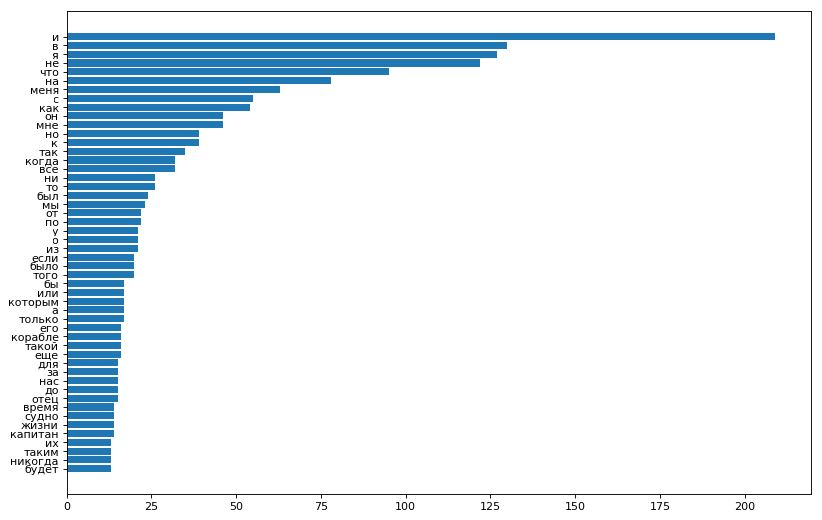

In [81]:
# т.к. от вывода всех уникальных слов практического смысла нету (т.к. они не помещаются на экране), выведем топ-50 слов

fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(111)

x = top.index
y = top['count'].values

_ = ax.barh(x, y, height=0.8)

In [ ]:
# теперь посчитаем предложения

In [82]:
with open('data/text.txt', 'r', encoding='windows-1251') as book:
    text = book.read()

In [83]:
text = text.encode('utf-8').decode('utf-8')

In [84]:
text[0:1000]

'Я родился в 1632 году в городе Йорке в зажиточной семье иностранного происхождения. Мой отец был родом из Бремена и основался сначала в Гулле. Нажив торговлей хорошее состояние, он оставил дела и переселился в Йорк. Здесь он женился на моей матери, родные которой назывались Робинзонами – старинная фамилия в тех местах. По ним и меня назвали Робинзоном. Фамилия отца была Крейцнер, но, по обычаю англичан коверкать иностранные слова, нас стали называть Крузо. Теперь мы и сами так произносим и пишем нашу фамилию; так же всегда звали меня и мои знакомые.\n\nУ меня было два старших брата. Один служил во Фландрии, в английском пехотном полку, – том самом, которым когда то командовал знаменитый полковник Локгарт; он дослужился до чина подполковника и был убит в сражении с испанцами под Дюнкирхеном. Что сталось со вторым моим братом – не знаю, как не знали мои отец и мать, что сталось со мной.\n\nТак как в семье я был третьим, то меня не готовили ни к какому ремеслу, и голова моя с юных лет бы

In [85]:
# из символов, которые не входят в алфавит, выбираем те, что могут означать разделение предложений

text = re.split(r'[\n!.?…]+', text)

In [87]:
text[:10]

['Я родился в 1632 году в городе Йорке в зажиточной семье иностранного происхождения',
 ' Мой отец был родом из Бремена и основался сначала в Гулле',
 ' Нажив торговлей хорошее состояние, он оставил дела и переселился в Йорк',
 ' Здесь он женился на моей матери, родные которой назывались Робинзонами – старинная фамилия в тех местах',
 ' По ним и меня назвали Робинзоном',
 ' Фамилия отца была Крейцнер, но, по обычаю англичан коверкать иностранные слова, нас стали называть Крузо',
 ' Теперь мы и сами так произносим и пишем нашу фамилию; так же всегда звали меня и мои знакомые',
 'У меня было два старших брата',
 ' Один служил во Фландрии, в английском пехотном полку, – том самом, которым когда то командовал знаменитый полковник Локгарт; он дослужился до чина подполковника и был убит в сражении с испанцами под Дюнкирхеном',
 ' Что сталось со вторым моим братом – не знаю, как не знали мои отец и мать, что сталось со мной']

In [88]:
# убираем пустые строки, которые могли появиться в результате разбиения текста

text = pd.Series(text)
text = text[text != '']

In [89]:
# с помощью метода text.apply(len) получаем Series значений длин предложений

sent_len = pd.DataFrame({'setnences': text,
                        'length': text.apply(len)}).set_index('setnences')

In [90]:
sent_len.head(5)

,length
setnences,
Я родился в 1632 году в городе Йорке в зажиточной семье иностранного происхождения,82
Мой отец был родом из Бремена и основался сначала в Гулле,58
"Нажив торговлей хорошее состояние, он оставил дела и переселился в Йорк",72
"Здесь он женился на моей матери, родные которой назывались Робинзонами – старинная фамилия в тех местах",104
По ним и меня назвали Робинзоном,33
